## Turmunkh Zorigt
## ECON128 - Homework 4
## Professor Salloum and Professor Vossmeyer

In [435]:
import pandas as pd
import numpy as np

dfIRS = pd.read_csv("IRS-Tax Filing.txt", sep = "\t", header = 0)
dfZillow = pd.read_csv("Zillow-Rents.txt", sep = "\t", header = 0)


In [436]:
dfIRS.head()

,Zip,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,0,259540,75820,27490,29802,10205184
1,35004,920,280,103,157,36673
2,35005,460,140,45,66,17559
3,35006,190,40,55,0,7668
4,35007,1870,530,174,287,73191


In [437]:
dfZillow.head()

,Zip,State,County,City,ZrentValue
0,10025,NY,New York,New York,3522
1,60657,IL,Cook,Chicago,1885
2,10023,NY,New York,New York,3783
3,60614,IL,Cook,Chicago,2125
4,79936,TX,El Paso,El Paso,992


In [438]:
df = pd.merge(dfZillow, dfIRS, on= "Zip")
#SQL - left join (data1)

In [439]:
df.shape

(15805, 10)

In [440]:
df.head()

,Zip,State,County,City,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,10025,NY,New York,New York,3522,6250,4460,1276,1415,280416
1,60657,IL,Cook,Chicago,1885,8490,7530,1002,3930,408987
2,10023,NY,New York,New York,3783,3860,3130,1023,752,173242
3,60614,IL,Cook,Chicago,2125,6930,6290,752,2903,335742
4,79936,TX,El Paso,El Paso,992,6280,1670,1428,927,235785


In [441]:
df.isnull().values.any() #check for empty values

False

In [442]:
df.describe()

,Zip,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
count,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000
mean,47438.655742,1508.407656,1078.310661,425.950016,292.220500,165.390889,43105.624676
std,28872.134744,765.863569,1025.107648,485.825928,348.195088,200.483674,41413.753812
min,1001.000000,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22727.000000,1056.000000,280.000000,80.000000,88.000000,36.000000,10879.000000
50%,45231.000000,1302.000000,720.000000,240.000000,178.000000,90.000000,28553.000000
75%,73460.000000,1725.000000,1620.000000,630.000000,374.000000,239.000000,65038.000000
max,99705.000000,16697.000000,8490.000000,7530.000000,5332.000000,3930.000000,408987.000000


In [443]:
df.corr()

,Zip,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
Zip,1.000000,0.036693,0.137298,0.072727,0.134326,0.040884,0.120196
ZrentValue,0.036693,1.000000,0.213716,0.339829,0.221984,0.215591,0.222731
NoReturns,0.137298,0.213716,1.000000,0.908992,0.741094,0.865661,0.995802
SingleReturns,0.072727,0.339829,0.908992,1.000000,0.654396,0.929273,0.936676
UnempComp,0.134326,0.221984,0.741094,0.654396,1.000000,0.577157,0.726675
StudentLoanDeductions,0.040884,0.215591,0.865661,0.929273,0.577157,1.000000,0.894390
TaxableIncome,0.120196,0.222731,0.995802,0.936676,0.726675,0.894390,1.000000


In [444]:
#transform values into log(varible + 1)
import math

df["NoReturns"] = df["NoReturns"].apply(lambda x: math.log(x+1))
df["SingleReturns"] = df["SingleReturns"].apply(lambda x: math.log(x+1))
df["UnempComp"] = df["UnempComp"].apply(lambda x: math.log(x+1))
df["StudentLoanDeductions"] = df["StudentLoanDeductions"].apply(lambda x: math.log(x+1))
df["TaxableIncome"] = df["TaxableIncome"].apply(lambda x: math.log(x+1))
df.describe()

,Zip,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
count,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000
mean,47438.655742,1508.407656,6.482394,5.411466,4.508400,4.235734,10.158510
std,28872.134744,765.863569,1.084538,1.254460,2.273407,1.737052,1.105961
min,1001.000000,515.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22727.000000,1056.000000,5.638355,4.394449,4.488636,3.610918,9.294682
50%,45231.000000,1302.000000,6.580639,5.484797,5.187386,4.510860,10.259552
75%,73460.000000,1725.000000,7.390799,6.447306,5.926926,5.480639,11.082742
max,99705.000000,16697.000000,9.046762,8.926783,8.581669,8.276649,12.921441


In [445]:
target = pd.DataFrame( df [["ZrentValue"]] ) #target variable
df_reg = pd.DataFrame( df [["NoReturns", "SingleReturns", "StudentLoanDeductions", "UnempComp", "TaxableIncome" ]]  )

df_reg.describe()

,NoReturns,SingleReturns,StudentLoanDeductions,UnempComp,TaxableIncome
count,15805.000000,15805.000000,15805.000000,15805.000000,15805.000000
mean,6.482394,5.411466,4.235734,4.508400,10.158510
std,1.084538,1.254460,1.737052,2.273407,1.105961
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.638355,4.394449,3.610918,4.488636,9.294682
50%,6.580639,5.484797,4.510860,5.187386,10.259552
75%,7.390799,6.447306,5.480639,5.926926,11.082742
max,9.046762,8.926783,8.276649,8.581669,12.921441


In [446]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#train using 90% of the data and use the rest for testing
x_train, x_test, y_train, y_test = train_test_split (df_reg, target, test_size = .10 ) 
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(14224, 5) (14224, 1)
(1581, 5) (1581, 1)


In [447]:
from sklearn.linear_model import LinearRegression 

#OLS regression
lm = LinearRegression()
model = lm.fit(x_train, y_train) 

In [448]:
print ("estimated intercept: ", lm.intercept_)
print ("estimated coefficients: ", lm.coef_)

estimated intercept:  [ 6807.02095353]
estimated coefficients:  [[  560.45731307   859.71942882    -5.82666314    10.63604638
  -1339.43609741]]


In [449]:
print("A 1% increase in the number of returns increases the Median Rent Value by", lm.coef_[0,0]/100,"dollars.")
print("A 1% increase in the number of single returns increases the Median Rent Value by", lm.coef_[0,1]/100,"dollars.\n")
print("""A possible explanation of these findings is that increased numbers of tax returns indicate a larger 
population in that area of zip codes. Consequently, there is higher demand for housing, which raises the median
rent values in the area. Single returns may result in higher rent values because this reduces the total number of 
people that can live inside a home. Since couples usually live together, they save space and have less of a 
driving force in raising rent values. \n""")
print("A 1% increase in the number of student loan interest deductions decreases the Median Rent Value by \n", -1*lm.coef_[0,2]/100,"dollars.")
print("""A possible explanation of this could be that people qualifying for more student loan interest deductions
also have lower incomes. This leads to less spending and demand for housing.\n""")
print("A 1% increase in total unemployment compensation increases the Median Rent Value by", lm.coef_[0,3]/100,"dollars.")
print("A 1% increase in the amount of taxable income decreases the Median Rent Value by", -1*lm.coef_[0,4]/100,"dollars.\n")
print("""These last two results are very interesting, and quite frankly counterintuitive. Higher unemployment should depress 
consumptions and prices, not increase them. Additionally, an area that has individuals with higher incomes
should have higher consumption rates and should raise the median rent value, not decrease them. \n """)


A 1% increase in the number of returns increases the Median Rent Value by 5.60457313067 dollars.
A 1% increase in the number of single returns increases the Median Rent Value by 8.59719428821 dollars.

A possible explanation of these findings is that increased numbers of tax returns indicate a larger 
population in that area of zip codes. Consequently, there is higher demand for housing, which raises the median
rent values in the area. Single returns may result in higher rent values because this reduces the total number of 
people that can live inside a home. Since couples usually live together, they save space and have less of a 
driving force in raising rent values. 

A 1% increase in the number of student loan interest deductions decreases the Median Rent Value by 
 0.0582666314471 dollars.
A possible explanation of this could be that people qualifying for more student loan interest deductions
also have lower incomes. This leads to less spending and demand for housing.

A 1% increas

In [450]:
# Make predictions using the x_test data
prediction = lm.predict (x_test)
prediction

array([[ 1443.51788902],
       [ 1199.51605586],
       [ 1487.18577392],
       ..., 
       [ 1587.04835018],
       [ 1596.39769201],
       [ 1360.86303924]])

In [451]:
from sklearn.metrics import mean_squared_error , r2_score

print ("Mean Squared Error: %.2f" % mean_squared_error (y_test, y_pred) )
print ("Variance score: %.2f" % r2_score(y_test, y_pred) ) # closer to 1, the better 
print ("%.2f percent of the variation in Zillow's Median Rent Value is explained the model." % float(-1.0*r2_score(y_test, y_pred)) )

Mean Squared Error: 711038.45
Variance score: -0.35
0.35 percent of the variation in Zillow's Median Rent Value is explained the model.


The predicted values don't fit the test values very well. Our predictions highly overestimate the actual
rent values. 


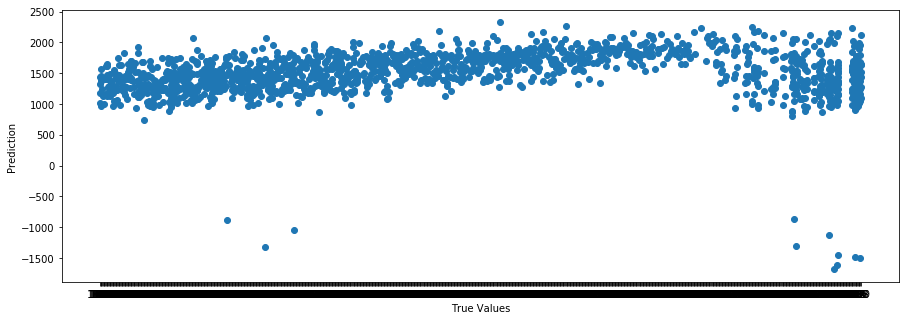

In [452]:
# Let's plot the model

plt.figure(figsize=(15,5))
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Prediction")

print("""The predicted values don't fit the test values very well. Our predictions highly overestimate the actual
rent values. """)

In this assignment, we used an OLS regression of Median Rent Values on the number of returns filed, number of single returns filed, total taxable income, total student loan interest deductions, and total unemployment compensation. We found that higher number of returns filed, number of single returns filed, and unemployment compensation positively contribute to higher median rent values. Two contradictory findings were that increases in total unemployment compensation increased the median rent value, while increases in the amount of taxable income decreased the median rent value. Given that our model highly overpredicted actual values and that our findings were economically counterintuitive, our model may be suspect erroneous methodology.

One flaw of our model was that we used a single train/test split test, randomly choosing 10% of the data as our test data. This may present a flaw in that this one random drawing may be skewed towards choosing the extremes or outliers in our original data, which would affect our analysis and results. To get around this flaw, we could perform a cross-validation test, which has a lower chance of choosing outliers in its test data.